- 在回归分析中，**shrinkage（收缩）**指的是通过某种正则化技术将回归系数的绝对值缩小，从而减少模型的复杂度，防止过拟合，并提高模型的泛化能力。具体来说，shrinkage 通过在损失函数中添加惩罚项，使得某些回归系数向零收缩。
- Ridge 回归（岭回归）在损失函数中加入了系数的 L2 范数惩罚项，即平方和。这种方法会使得回归系数向零收缩，但通常不会使系数恰好为零，从而保持所有特征在模型中。
- Lasso 回归（最小绝对收缩和选择算子）在损失函数中加入了系数的 L1 范数惩罚项，即绝对值和。这种方法不仅会使回归系数向零收缩，**还可能导致某些系数恰好为零**，从而实现**特征选择**。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# 生成模拟数据
np.random.seed(0)
X, y, coef = make_regression(n_samples=100, n_features=20, coef=True, noise=10, random_state=42)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# 定义模型
ols = LinearRegression()
ridge = Ridge(alpha=5.0)
lasso = Lasso(alpha=2.)

In [27]:
# 拟合模型
ols.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=2.0)

In [28]:
from sklearn.metrics import mean_squared_error

y_pred_ols = ols.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

# 计算MSE
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# 计算R²分数
r2_ols = ols.score(X_test_scaled, y_test)
r2_ridge = ridge.score(X_test_scaled, y_test)
r2_lasso = lasso.score(X_test_scaled, y_test)

print('mse', mse_ols, mse_ridge, mse_lasso)
print('r2', r2_ols, r2_ridge, r2_lasso)

mse 151.2388576046553 236.76967483284452 178.3223030790967
r2 0.9909439489679166 0.9858224381478664 0.9893222158483612


In [29]:
# 获取系数
coef_ols = ols.coef_
coef_ridge = ridge.coef_
coef_lasso = lasso.coef_

print(coef_ols)
print(coef_ridge)
print(coef_lasso)

[ 5.69800347 93.95635476 38.78630983  0.70304159  0.92814908 -0.49252769
 12.18486875 84.6952901  75.04417506 36.78957916  1.10805952  1.38774345
  2.30328376  1.43636687 -0.80630567 31.35672256  8.64050549  1.55252526
 -0.14456932 46.12018342]
[ 5.41219329e+00  8.91152818e+01  3.56837728e+01  2.01078783e+00
  9.73875895e-01 -7.04275994e-01  1.08379498e+01  7.96407679e+01
  7.03706996e+01  3.66375873e+01 -7.33302828e-03  1.74981107e+00
  3.47049981e+00  8.84599420e-01 -1.52864109e+00  2.91177267e+01
  7.52279345e+00 -8.20640815e-02 -9.67501018e-01  4.30522960e+01]
[ 2.52873604 92.27844173 36.47519957  0.20606285 -0.         -0.
  9.29359144 82.9759088  73.04675014 35.0622863   0.          0.
  0.15494941  0.         -0.         29.34900273  5.42044995  0.
 -0.         44.98573546]


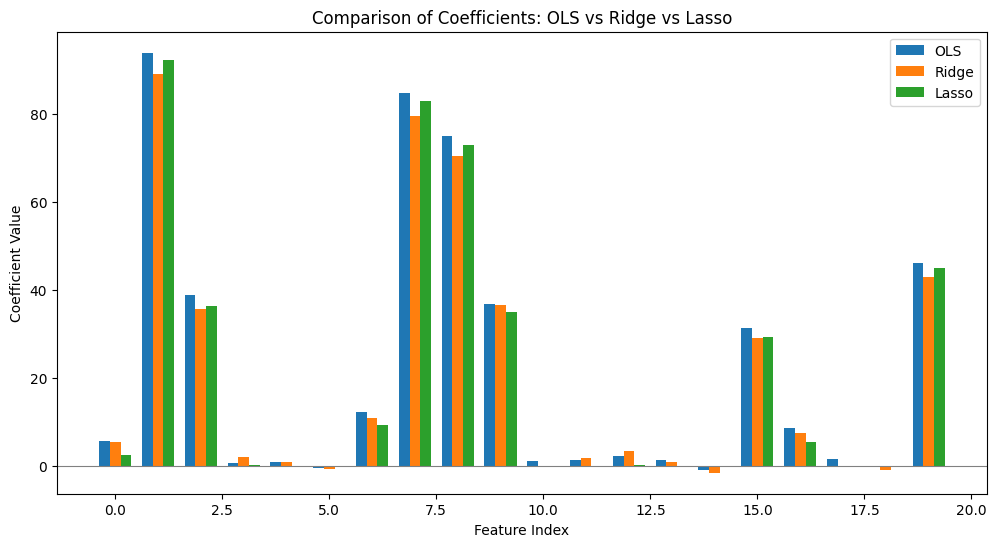

In [30]:
# 绘图比较
indices = np.arange(len(coef))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(indices - width, coef_ols, width=width, label='OLS')
plt.bar(indices, coef_ridge, width=width, label='Ridge')
plt.bar(indices + width, coef_lasso, width=width, label='Lasso')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients: OLS vs Ridge vs Lasso')
plt.legend()
plt.show()